In [73]:
# Import Libraries needed
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Installed Graphviz using Pip3

In [74]:
data_file_path = '/Users/roos/Data/all_trials_noNaN_CTET2.csv'
data_file = pd.read_csv(data_file_path)
# data_ctet = data_file[[ '9A00000045146841', #'FF00000045298741',
#        'F9000000452CCF41', '76000000452C9741', '7200000045201D41', '4B0000004516B141', 'CB000000452D7441', 'DPG_finger-chest',
#        'DPG_nose-forehead', 'DPG_pinna-mastoid', 'results']]
data_ctet = data_file[['Age', 'Gender', 'MEQ_type', 'PSQI', 'results']]
# data_ctet = data_file[['Age', 'Gender', 'MEQ_type', 'PSQI','9A00000045146841',
#        'F9000000452CCF41', '76000000452C9741', '7200000045201D41', '4B0000004516B141', 'CB000000452D7441', 'DPG_finger-chest',
#        'DPG_nose-forehead', 'DPG_pinna-mastoid', 'results']]

In [75]:
#Encode categorical variables
#Gender
encoder = LabelEncoder()
label_encoder_gender = encoder.fit(data_ctet['Gender'])
print("gender classes:", label_encoder_gender.classes_)
integer_classes_gender = label_encoder_gender.transform(label_encoder_gender.classes_)
print("Gender integer classes", integer_classes_gender)
code = label_encoder_gender.transform(data_ctet['Gender'])
data_ctet['Gender'] = code

# MEQ_type
label_encoder_MEQ = encoder.fit(data_ctet['MEQ_type'])
print("MEQ classes:", label_encoder_MEQ.classes_)
integer_classes_MEQ = label_encoder_MEQ.transform(label_encoder_MEQ.classes_)
print("MEQ> integer classes", integer_classes_MEQ)
code_MEQ = label_encoder_MEQ.transform(data_ctet['MEQ_type'])
data_ctet['MEQ_type'] = code_MEQ

gender classes: ['female' 'male']
Gender integer classes [0 1]
MEQ classes: ['evening' 'intermediate' 'morning']
MEQ> integer classes [0 1 2]


In [76]:
# Splitting the data
X = data_ctet.drop('results', axis=1).values
Y = data_ctet['results'].values
print('X shape: {}'.format(np.shape(X)))
print('Y shape: {}'.format(np.shape(Y)))

X_train1, X_test, Y_train1, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

X shape: (4050, 4)
Y shape: (4050,)


In [77]:
dt = DecisionTreeClassifier(max_depth=5, random_state=33)
dt.fit(X_train1, Y_train1)
print("train", Y_train1.sum()/(len(Y_train1)))
print("test", Y_test.sum()/len(Y_test))

train 0.5601851851851852
test 0.5370370370370371


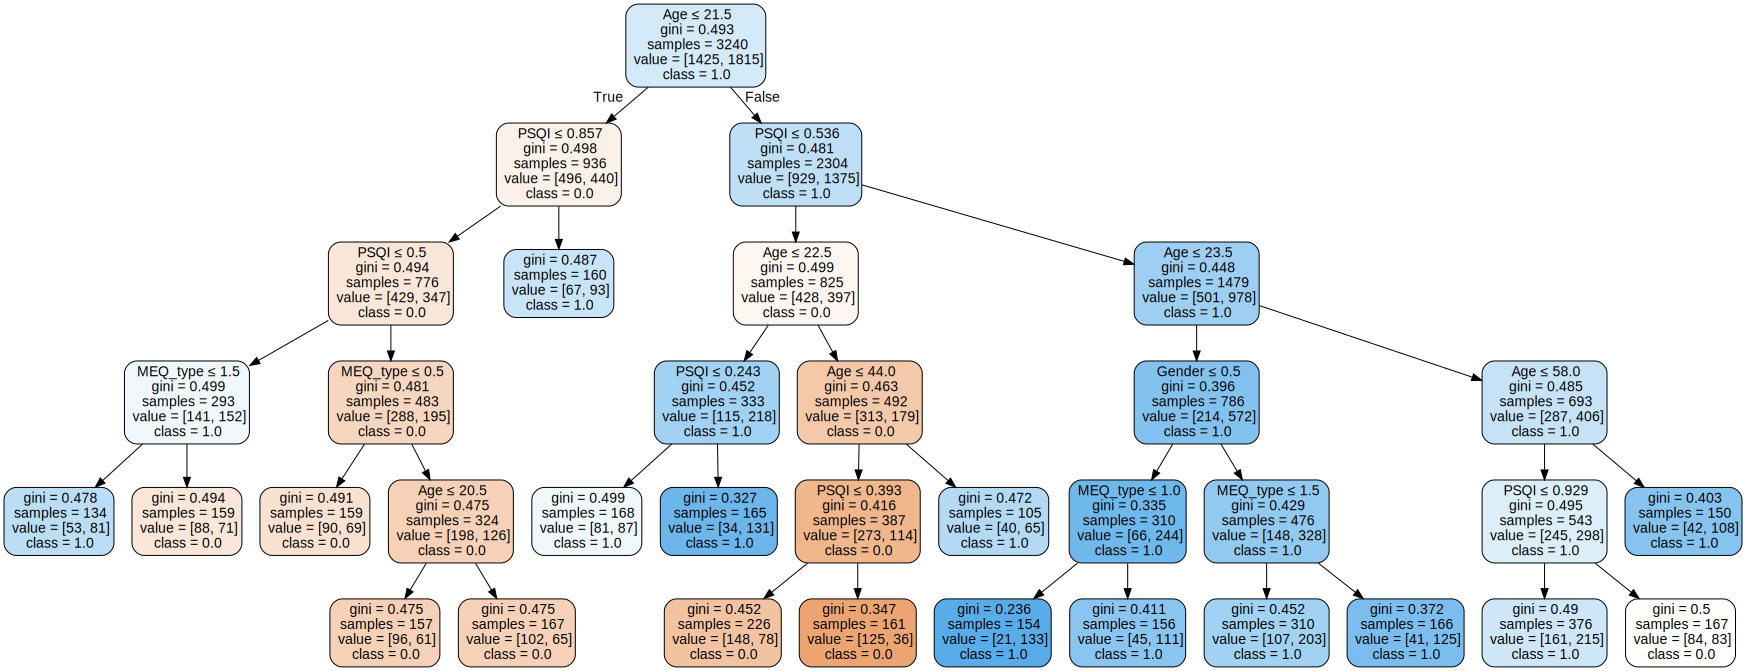

In [78]:
import graphviz

dot_data =  tree.export_graphviz(dt, out_file=None,
                                   feature_names=data_ctet.drop('results', axis=1).columns,
                                   class_names=['0.0', '1.0'],
                                   filled=True, rounded=True,
                                   special_characters=True)
graph = graphviz.Source(dot_data)
#graph.render('model3.gv', view=True)
graph

In [79]:
X_train, X_validate, Y_train, Y_validate = train_test_split(X_train1, Y_train1, train_size=0.7, test_size=0.3, random_state=0)
print("train", Y_train.sum()/(len(Y_train)))
print("validate", Y_validate.sum()/(len(Y_validate)))
print("test", Y_test.sum()/len(Y_test))

train 0.5599647266313933
validate 0.5606995884773662
test 0.5370370370370371


100 0.6275720164609053
150 0.6275720164609053
200 0.6275720164609053
250 0.6275720164609053
300 0.6275720164609053
350 0.6275720164609053
400 0.6275720164609053
450 0.6275720164609053
500 0.6275720164609053


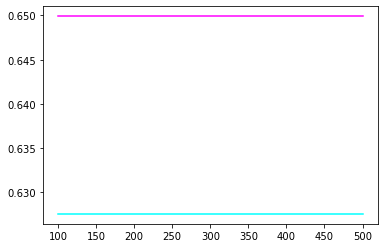

1 0.5576131687242798
2 0.6152263374485597
3 0.6111111111111112
4 0.6275720164609053
5 0.6275720164609053
6 0.6203703703703703
7 0.6203703703703703
8 0.6203703703703703
9 0.6203703703703703
10 0.6203703703703703
11 0.6203703703703703
12 0.6203703703703703
13 0.6203703703703703


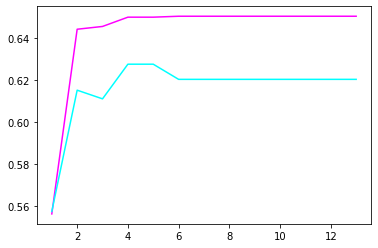

In [80]:
# Trying different trees
test_acc_tree = []
val_acc_tree = []
trees = [100, 150, 200, 250, 300, 350, 400, 450, 500]
for num_trees in range(100, 501, 50):
    random_forest = RandomForestClassifier(n_estimators=num_trees, random_state=33, max_depth=5)
    random_forest.fit(X_train, Y_train)
    test_acc_tree.append(random_forest.score(X_train, Y_train))
    # Accuracy on validation
    val_acc_tree.append(random_forest.score(X_validate, Y_validate))
    print(num_trees, random_forest.score(X_validate, Y_validate))
plt.plot(trees, test_acc_tree, c="magenta")
plt.plot(trees, val_acc_tree, c="aqua")
plt.show()

# test_acc_st = []
# val_acc_st = []
# states = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 32,33,34,35,36,37,38,39,40,41,42]
# for state in states:
#     random_forest = RandomForestClassifier(n_estimators=450, random_state=state, max_depth=5)
#     random_forest.fit(X_train, Y_train)
#     test_acc_st.append(random_forest.score(X_train, Y_train))
#     # Accuracy on validation
#     val_acc_st.append(random_forest.score(X_validate, Y_validate))
#     print(state, random_forest.score(X_validate, Y_validate))
# plt.plot(states, test_acc_st, c="magenta")
# plt.plot(states, val_acc_st, c="aqua")
# plt.show()

test_acc_depth = []
val_acc_depth = []
depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
for max_depth in range(1, 14, 1):
    random_forest = RandomForestClassifier(n_estimators=100, random_state=33, max_depth=max_depth)
    random_forest.fit(X_train, Y_train)
    test_acc_depth.append(random_forest.score(X_train, Y_train))
    val_acc_depth.append( random_forest.score(X_validate, Y_validate))
    print(max_depth, random_forest.score(X_validate, Y_validate))

plt.plot(depth, test_acc_depth, c="magenta")
plt.plot(depth, val_acc_depth, c="aqua")
plt.show()

In [81]:
# Accuracy on Test
random_forest = RandomForestClassifier(n_estimators=100, random_state=33)
random_forest.fit(X_train, Y_train)
print("Training Accuracy is: ", random_forest.score(X_train, Y_train))
# Accuracy on Train
print("validates Accuracy is: ", random_forest.score(X_validate, Y_validate))

# Accuracy on Test
random_forest2 = RandomForestClassifier(n_estimators=100, random_state=33, max_depth=5)
random_forest2.fit(X_train, Y_train)
print("Training Accuracy is: ", random_forest2.score(X_train, Y_train))
# Accuracy on Train
print("validates Accuracy is: ", random_forest2.score(X_validate, Y_validate))
#print("testing Accuracy is: ", random_forest2.score(X_test, Y_test))

Training Accuracy is:  0.650352733686067
validates Accuracy is:  0.6203703703703703
Training Accuracy is:  0.6499118165784833
validates Accuracy is:  0.6275720164609053


In [82]:
# Building a forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=33, max_depth=5)
random_forest.fit(X_train1, Y_train1)
# prediction_test = random_forest.predict(X=X_test)

# Accuracy on Test
print("Training Accuracy is: ", random_forest.score(X_train, Y_train))
# Accuracy on Train
print("Testing Accuracy is: ", random_forest.score(X_test, Y_test))

# Building a forest
random_forest3 = RandomForestClassifier(n_estimators=100, random_state=13)
random_forest3.fit(X_train1, Y_train1)
# prediction_test = random_forest.predict(X=X_test)

# Accuracy on Test
print("Training Accuracy is: ", random_forest3.score(X_train, Y_train))
# Accuracy on Train
print("Testing Accuracy is: ", random_forest3.score(X_test, Y_test))

Training Accuracy is:  0.6499118165784833
Testing Accuracy is:  0.6444444444444445
Training Accuracy is:  0.6490299823633157
Testing Accuracy is:  0.6419753086419753
